In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/05_housing_data_renamed_columns.csv')
df["date"] = pd.to_datetime(df["date"])

Create a new column "half_year" indicating whether the record falls in the first (H1) or second (H2) half of the year

In [4]:
def get_half_year(row):
    if row.month <= 6:
        return f"{row.year}-H1"
    else:
        return f"{row.year}-H2"

df["half_year"] = df["date"].apply(get_half_year)

In [5]:
df.head()

,region_id,region_name,region_type,state_name,size_rank,date,zhvi_all_homes,zhvi_single_family,zhvi_condo,sales_count_sfr,...,unemployment_rate,median_income,population,num_major_disasters_last_12mo,major_disaster_declared,most_recent_disaster_type,state_full,sales_tax,income_tax,half_year
0,102001,United States,country,US,0,2018-01-31,222399.430599,221704.438544,232520.632007,248552.0,...,4.0,75790.0,327969.000,0,0,NaN,NaN,NaN,NaN,2018-H1
1,394913,"New York, NY",msa,NY,1,2018-01-31,468289.939148,458621.808084,496261.053175,10754.0,...,4.5,80700.0,19544.098,0,0,NaN,NEW YORK,4.00,8.82,2018-H1
2,753899,"Los Angeles, CA",msa,CA,2,2018-01-31,613037.032936,637911.684582,469858.117823,5302.0,...,4.4,84560.0,39437.463,1,1,Severe Storm,CALIFORNIA,7.25,13.30,2018-H1
3,394463,"Chicago, IL",msa,IL,3,2018-01-31,227029.700914,231794.550568,190146.965317,5550.0,...,4.5,84140.0,12724.685,0,0,NaN,ILLINOIS,6.25,4.95,2018-H1
4,394514,"Dallas, TX",msa,TX,4,2018-01-31,238849.482465,240010.957031,163186.511511,5077.0,...,4.1,71720.0,28624.564,0,0,NaN,TEXAS,6.25,0.00,2018-H1


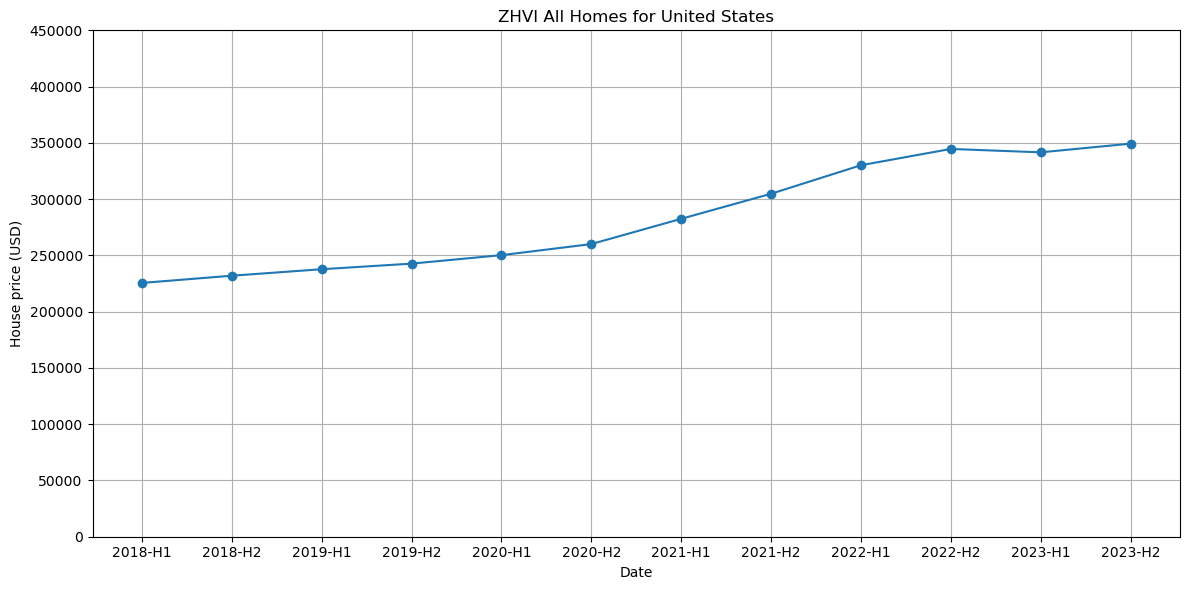

In [6]:
us_df = df[df["region_name"] == "United States"].copy()

half_year_avg = us_df.groupby("half_year")["zhvi_all_homes"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(half_year_avg["half_year"], half_year_avg["zhvi_all_homes"], marker="o", linestyle='-')
plt.title("ZHVI All Homes for United States")
plt.xlabel("Date")
plt.ylabel("House price (USD)")
plt.ylim(bottom=0, top=450000)
plt.grid(True)
plt.tight_layout()

plt.savefig("../visuals/zhvi_across_us.png", dpi=300, bbox_inches='tight')
plt.show()

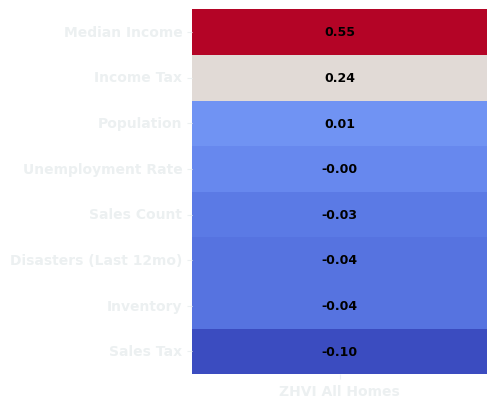

In [7]:
label_dict = {
    "sales_count_sfr": "Sales Count",
    "inventory_sfr": "Inventory",
    "unemployment_rate": "Unemployment Rate",
    "median_income": "Median Income",
    "population": "Population",
    "sales_tax": "Sales Tax",
    "income_tax": "Income Tax",
    "num_major_disasters_last_12mo": "Disasters (Last 12mo)"
}

numeric_cols = [
    "zhvi_all_homes", "sales_count_sfr", "inventory_sfr",
    "unemployment_rate", "median_income", "population",
    "sales_tax", "income_tax", "num_major_disasters_last_12mo"
]

corr_matrix = df[numeric_cols].corr()
target_corr = corr_matrix["zhvi_all_homes"].drop("zhvi_all_homes").sort_values(ascending=False)

yticklabels = [label_dict.get(var, var) for var in target_corr.index]
xticklabels = ["ZHVI All Homes"]

dpi = 100
figsize = (381 / dpi, 474 / dpi)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    annot_kws={"color": "#000000", "fontsize": 9, "fontweight": "bold"},
    cmap="coolwarm",
    fmt=".2f",
    cbar=False,
    yticklabels=yticklabels,
    xticklabels=xticklabels,
    ax=ax
)

ax.set_facecolor("none")
fig.patch.set_alpha(0)

# ax.set_title(
#     "Correlation between ZHVI All Homes and other variables",
#     fontsize=14,
#     color="#ECF0F1",
#     fontweight="bold"
# )

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(colors="#ECF0F1", labelsize=10)  

for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
    tick_label.set_fontweight("bold")

plt.savefig("../visuals/correlation_across_variables.png", dpi=dpi, bbox_inches='tight', transparent=True)
plt.show()

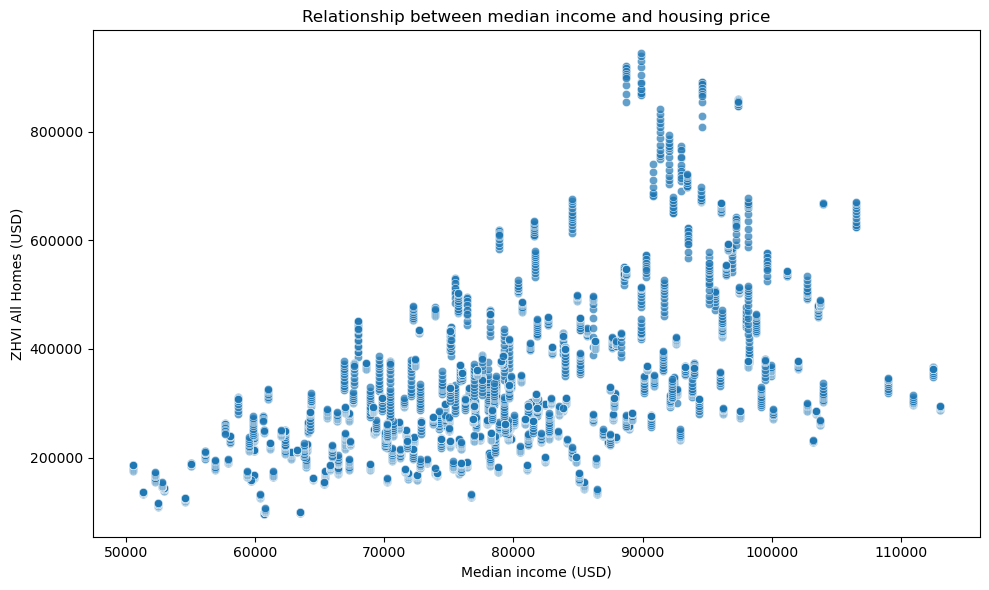

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="median_income", y="zhvi_all_homes", alpha=0.7)
plt.title("Relationship between median income and housing price")
plt.xlabel("Median income (USD)")
plt.ylabel("ZHVI All Homes (USD)")
plt.tight_layout()

plt.savefig("../visuals/relation_between_income_and_price.png", dpi=300, bbox_inches='tight')
plt.show()